In [3]:
from skymap import utils
import numpy as np 
import matplotlib.pyplot as plt
import h5py
from pathlib import Path


In [4]:

notebook_dir = Path().resolve()
data_file = notebook_dir.parent / "data_310" / "gbt_beam_scans_2026-01-13T150238.hdf5"

print(data_file)

data = utils.read_hdf5_data(data_file)

print(f"File loaded: {data_file}")


/Users/akshatha.vydula/packages_310/skymap/data_310/gbt_beam_scans_2026-01-13T150238.hdf5
File loaded: /Users/akshatha.vydula/packages_310/skymap/data_310/gbt_beam_scans_2026-01-13T150238.hdf5


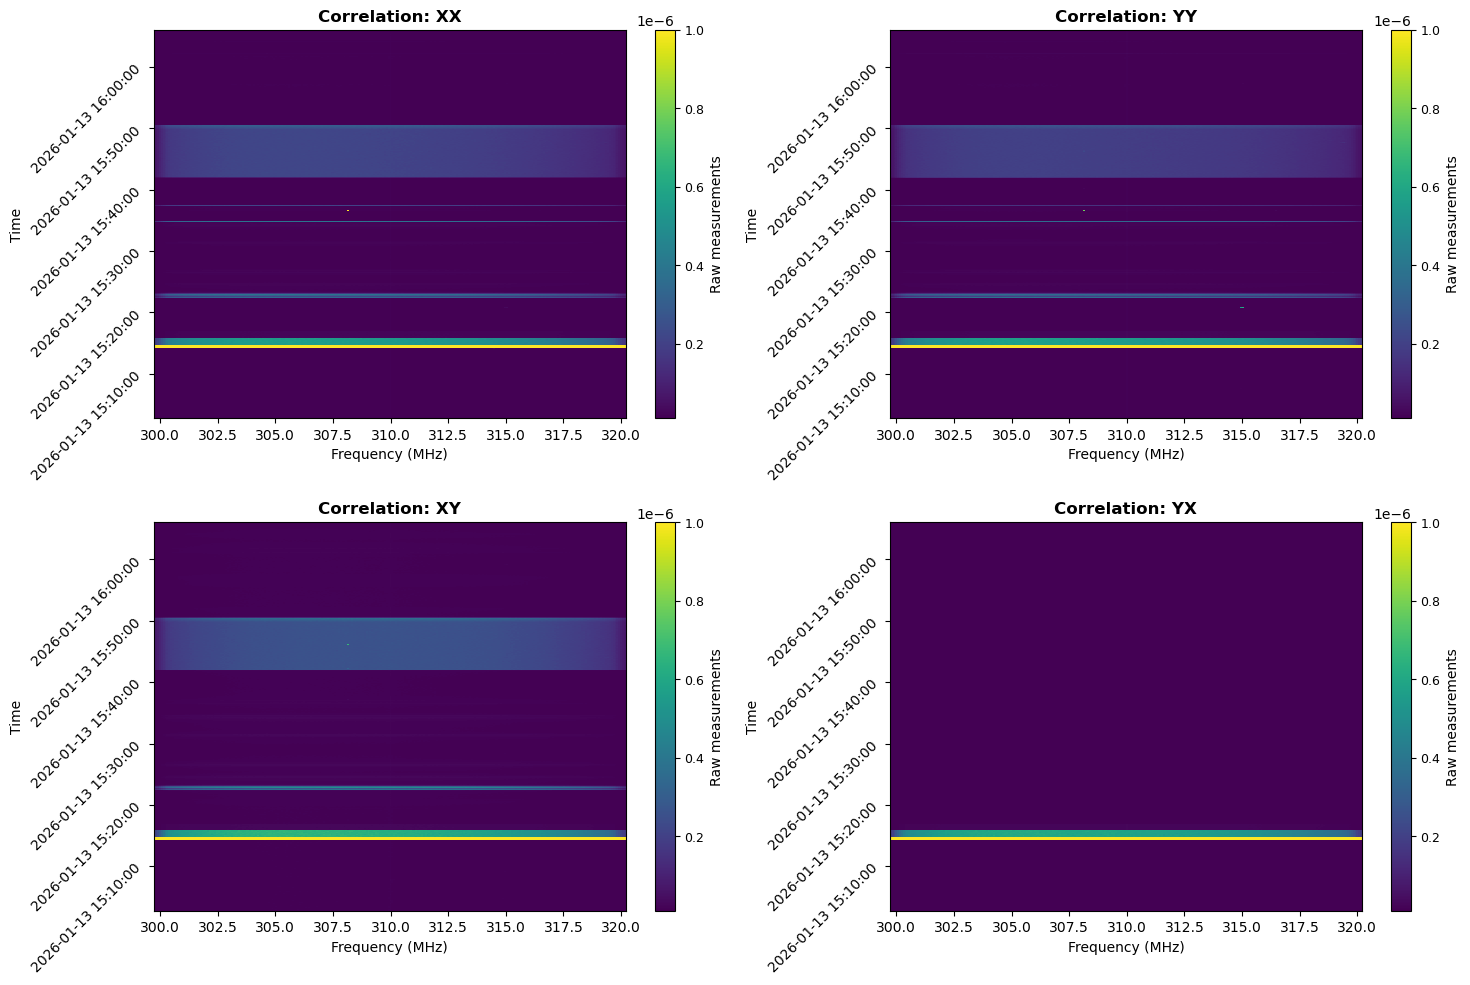

In [5]:
utils.plot_waterwall(data, clim=(1e-8, 1e-6))

In [11]:
with h5py.File(data_file, 'r') as f:
    dset = f['data']['spec']
    print(list(f['data'].keys()), f['diag'], f['hdr'])
    print("shape:", dset.shape)
    print("dtype:", dset.dtype)
    print("chunks:", dset.chunks)
    print("compression:", dset.compression)

['freq', 'id', 'spec', 'time'] <HDF5 group "/diag" (9 members)> <HDF5 group "/hdr" (0 members)>
shape: (50110, 10, 256)
dtype: complex64
chunks: (64, 2, 32)
compression: None


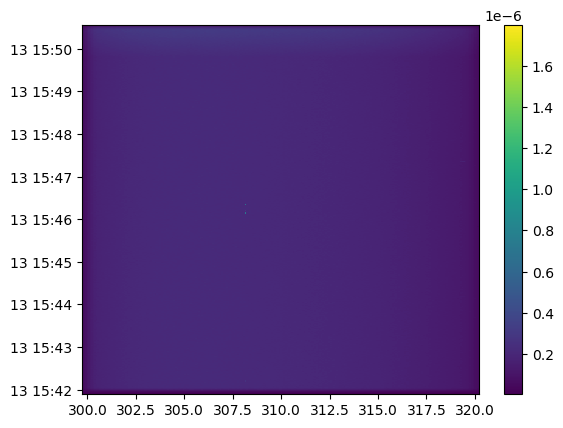

In [24]:
peak_scan_slice = slice(23500, 28700)

plt.pcolormesh(data.freq, data.time[peak_scan_slice], np.abs(data.spec.XX[peak_scan_slice]))
plt.colorbar()
plt.show()






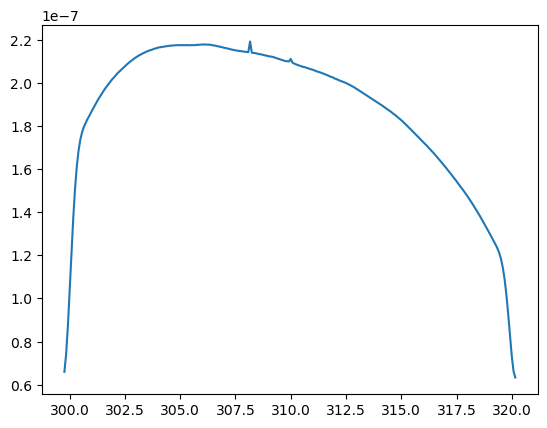

In [25]:
cyg_a_peak = np.mean(np.abs(data.spec.XX[peak_scan_slice]), axis=0)
plt.plot(data.freq, cyg_a_peak)
plt.show()


